*************************Normal Equation*************************
theta: [[3.34254731]
 [3.70568231]
 [1.93311727]]
*************************Print cost function of each iterations*************************
cost: 38.23960512866233
cost: 33.6500018802211
cost: 29.61862062612386
cost: 26.077560235623743
cost: 22.96717900027967
cost: 20.2350899659566
cost: 17.83527847165887
cost: 15.727327030076937
cost: 13.875734492906554
cost: 12.249318032232633
cost: 10.820687864312536
cost: 9.565785867444609
cost: 8.463480321907639
cost: 7.49520994533753
cost: 6.644671227292248
cost: 5.897543796134204
cost: 5.241249192016036
cost: 4.664738982484096
cost: 4.158308651492271
cost: 3.7134341267736515
cost: 3.3226281918624085
cost: 2.979314364016387
cost: 2.6777161135053427
cost: 2.4127595581561363
cost: 2.179987994037748
cost: 1.9754868225496685
cost: 1.7958176093053198
cost: 1.637960164027883
cost: 1.499261665790419
cost: 1.37739197661151
cost: 1.2703043906609004
cost: 1.1762011578928506
cost: 1.0935032013

cost: 0.44198202358880523
cost: 0.4419587867361252
cost: 0.4419356433212278
cost: 0.44191259295893653
cost: 0.4418896352657872
cost: 0.44186676986001716
cost: 0.4418439963615565
cost: 0.44182131439201844
cost: 0.4417987235746925
cost: 0.4417762235345325
cost: 0.44175381389815044
cost: 0.44173149429380615
cost: 0.44170926435139835
cost: 0.44168712370245844
cost: 0.44166507198013855
cost: 0.44164310881920527
cost: 0.4416212338560302
cost: 0.44159944672858253
cost: 0.4415777470764198
cost: 0.4415561345406791
cost: 0.4415346087640707
cost: 0.4415131693908689
cost: 0.4414918160669027
cost: 0.44147054843955
cost: 0.4414493661577276
cost: 0.44142826887188497
cost: 0.44140725623399535
cost: 0.4413863278975474
cost: 0.4413654835175393
cost: 0.44134472275046904
cost: 0.4413240452543284
cost: 0.4413034506885937
cost: 0.44128293871421925
cost: 0.44126250899363006
cost: 0.44124216119071397
cost: 0.4412218949708145
cost: 0.44120171000072217
cost: 0.44118160594866923
cost: 0.4411615824843224
cost: 0.

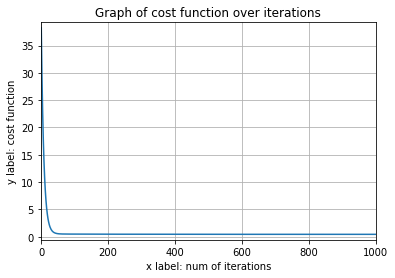

*************************Final Result*************************
Title: Linear Regression Using Gradient Descent
Author:Siyu (Max) Chen  CWID:10424481
learning rate: 0.01   num of iterations: 1000
b  (which should be 2): 2.0568093650672172
m1 (which should be 3): 3.2830648022407956
m2 (which should be 4): 3.6517385445355046
cost: 0.4372406289685465
*************************Comments*************************
I would like to choose 0.01 as learning rate to make linear regression in this case.
Actually I tried different alphas and numbers of iteraions to test the algorithm, I found
tha if we choose a large value of alpha like 0.1, cost function would descend too fast
and it could be hard to get to the true minimum value. On the contrary, the cost function
would descend too slow if we set a small alpha like 0.001 or 0.0001. Cost function even could not
go to the minimum point after 1000 times iterations. Overall, I finally choose 0.01 as learning
rate which would provide a good result.


In [20]:
import numpy as np 
from numpy.linalg import inv
import matplotlib as mpl          
import matplotlib.pyplot as plt
# library matplotlib and matplotlib.pyplot is just used for drawing graph

# Homework Complete gradient descend for linear regression 
# Author:Siyu (Max) Chen  CWID:10424481

x1 = 2 * np.random.rand(100, 1)
x2 = 2 * np.random.rand(100, 1)
b = np.ones(100)
y = 3 * x1 + 4 * x2 + np.random.randn(100, 1) + 2

print("*************************Normal Equation*************************")
X = np.column_stack((x1,x2,b))
theta = inv(X.T.dot(X)).dot(X.T).dot(y)
print("theta:", theta)

# we could set the number of iterations and the learning rate(alpha) here
global_num_iterations = 1000
global_learning_rate = 0.01
global_cost_record = np.random.rand(global_num_iterations, 1)*0

def gradient_step(b_current,m1_current,m2_current, X1, X2 , Y, learning_rate):
    b_gradient = 0
    m1_gradient = 0
    m2_gradient = 0
    N = float(len(X1))
    for i in range(0, len(X1)):
        x1 = X1[i,0]
        x2 = X2[i,0]
        y = Y[i,0]
        b_gradient += -(2/N) * (y - (m1_current * x1 + m2_current * x2 + b_current))
        m1_gradient += -(2/N) * x1 * (y - (m1_current * x1 + m2_current * x2 + b_current))
        m2_gradient += -(2/N) * x2 * (y - (m1_current * x1 + m2_current * x2 + b_current))
        # Compute the gradient value of b,m1 and m2
    new_b = b_current - (learning_rate * b_gradient)
    new_m1 = m1_current - (learning_rate * m1_gradient) 
    new_m2 = m2_current - (learning_rate * m2_gradient) 
    return [new_b,new_m1,new_m2]

def cost_compute(b,m1,m2,X1,X2,Y):
    # 
    totalError = 0 
    for i in range (0, len(X1)):
        x1 = X1[i, 0]
        x2 = X2[i ,0]
        y = Y[i, 0]
        totalError += (y-(m1*x1 + m2*x2 + b)) ** 2
    return totalError/ (2 * float(len(X1)))

def linear_regression_gradient_descent(X1,X2,Y,learning_rate,num_iterations):
    b = 0
    m1 = 0
    m2 = 0
    for i in range(num_iterations):
        b,m1,m2 = gradient_step(b,m1,m2, X1,X2 ,Y ,learning_rate)
        global_cost_record[i,0] = cost_compute(b,m1,m2,x1,x2,y)
        print("cost:",cost_compute(b,m1,m2,x1,x2,y))
    return [b,m1,m2]

print("*************************Print cost function of each iterations*************************")
b,m1,m2 = linear_regression_gradient_descent(x1,x2,y,global_learning_rate,global_num_iterations)
cost = cost_compute(b,m1,m2,x1,x2,y)
print("*************************End of print*************************")

plt.plot(global_cost_record)
plt.grid(True) 
plt.title("Graph of cost function over iterations")
plt.xlabel("x label: num of iterations")
plt.ylabel("y label: cost function")
plt.xlim(-1,len(global_cost_record))
plt.ylim(np.min(global_cost_record)- 1, np.max(global_cost_record) + 1)

plt.show()

print("*************************Final Result*************************")
print("Title: Linear Regression Using Gradient Descent")
print("Author:Siyu (Max) Chen  CWID:10424481")
print("learning rate:", global_learning_rate,"  num of iterations:" ,global_num_iterations)
print("b  (which should be 2):",b)
print("m1 (which should be 3):",m1)
print("m2 (which should be 4):",m2)
print("cost:",cost)
print("*************************Comments*************************")
print("I would like to choose 0.01 as learning rate to make linear regression in this case.")
print("Actually I tried different alphas and numbers of iteraions to test the algorithm, I found")
print("tha if we choose a large value of alpha like 0.1, cost function would descend too fast")
print("and it could be hard to get to the true minimum value. On the contrary, the cost function")
print("would descend too slow if we set a small alpha like 0.001 or 0.0001. Cost function even could not")
print("go to the minimum point after 1000 times iterations. Overall, I finally choose 0.01 as learning")
print("rate which would provide a good result.")
#that 